Punti:  [[21 15]
 [ 9  9]
 [28 24]
 [29  0]]
Neighbors: {0: [2, 1], 1: [0, 3], 2: [0, 3], 3: [2, 1]}


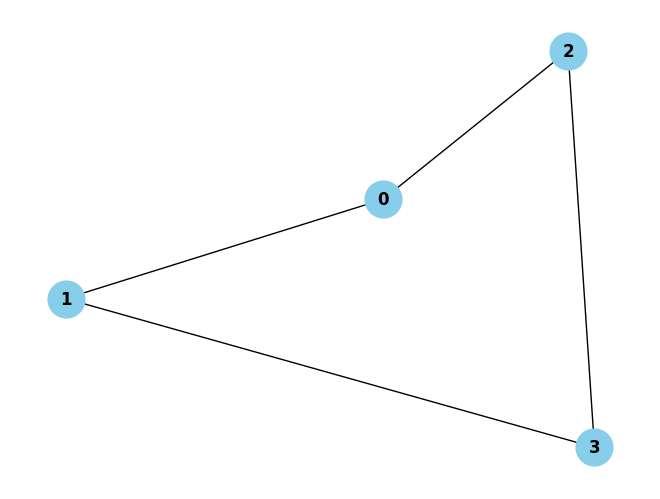

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import networkx as nx

def intersect(segment1, segment2):
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

    def do_segments_intersect(A, B, C, D):
        return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

    A, B = segment1
    C, D = segment2

    return do_segments_intersect(A, B, C, D)

# Number of points
n = 4
points = np.random.randint(0, 30, size=(n, 2))
connections = []
print("Punti: ", points)
neighbors = {i: [] for i in range(n)}
regions = {i: set([i]) for i in range(n)}

for c in range(0, n * (n - 1) // 2):
    i = np.random.choice(n-1)
    distances = cdist([points[i]], points, metric='euclidean')
    distances[0, i] = np.inf
    min_ind = np.argmin(distances[0])

    new_connection = (i, min_ind)

    if i != min_ind:
        attempts = 0
        while (i, min_ind) in connections or (min_ind, i) in connections:
            distances[0, min_ind] = np.inf
            min_ind = np.argmin(distances[0])
            if min(distances[0]) == np.inf or attempts >= n:
                break

            new_connection = (i, min_ind)
            attempts += 1

        if i != min_ind:    
            if (i, min_ind) not in connections and (min_ind, i) not in connections:
                if all(not intersect((points[new_connection[0]], points[new_connection[1]]), (points[existing_connection[0]], points[existing_connection[1]])) for existing_connection in connections):
                    connections.append((i, min_ind))
                    neighbors[i].append(min_ind)
                    neighbors[min_ind].append(i)

# Graph visualization
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from(connections)

# print the neighbors
print("Neighbors:", neighbors)

pos = {i: points[i] for i in range(n)}
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', edgelist=connections)
plt.show()

In [3]:
import timeit

In [2]:
###     K=3
colors=['R', 'G', 'B']
map_coloring_problem = MapColoringCSP(colors, neighbors)

NameError: name 'MapColoringCSP' is not defined

In [ ]:
#   min-conflicts
def min_conf():
    solution = min_conflicts(map_coloring_problem)
    print(solution)

elapsed_time=timeit.timeit(min_conf, number=1)
print(f"Tempo di esecuzione min_conflicts: {elapsed_time} secondi")

#   backtracking
def backtr():
    solution = backtracking_search(map_coloring_problem)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking: {elapsed_time} secondi")

#   backtracking with forward checking
def backtr_fwrc():
    solution = backtracking_search(map_coloring_problem, inference=forward_checking)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking with forward checking: {elapsed_time} secondi")

#   backtracking with arc consistency
def backtr_fwrc():
    solution = backtracking_search(map_coloring_problem, inference=mac)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking with arc consistency: {elapsed_time} secondi")

In [ ]:
###     K=4
colors=['R', 'G', 'B', 'Y']
map_coloring_problem = MapColoringCSP(colors, neighbors)

In [ ]:
#   min-conflicts
def min_conf():
    solution = min_conflicts(map_coloring_problem)
    print(solution)

elapsed_time=timeit.timeit(min_conf, number=1)
print(f"Tempo di esecuzione min_conflicts: {elapsed_time} secondi")

#   backtracking
def backtr():
    solution = backtracking_search(map_coloring_problem)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking: {elapsed_time} secondi")

#   backtracking with forward checking
def backtr_fwrc():
    solution = backtracking_search(map_coloring_problem, inference=forward_checking)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking with forward checking: {elapsed_time} secondi")

#   backtracking with arc consistency
def backtr_fwrc():
    solution = backtracking_search(map_coloring_problem, inference=mac)
    print(solution)

elapsed_time=timeit.timeit(backtr, number=1)
print(f"Tempo di esecuzione backtracking with arc consistency: {elapsed_time} secondi")